In [1]:
%who

Interactive namespace is empty.


In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [231]:
%who

Interactive namespace is empty.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy.optimize as opt 
import random 
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Method: prepare_data
This is the function which accepts the datafarme, changes the categorical variable into dummy variables, splits the data into training and test datasets.

In [3]:
# Note: before calling this function, treat the ordinal variables
def prepare_data(data):
    #separating the features which are 'categorical' from 'numerical' features
    #feature_cat contains the names of all categorical features.
    #feature_num comtains the names of all numericla feature.
    
    feature_cat = data.select_dtypes(include=['object']).columns.values
    feature_num = data.select_dtypes(include=['int64']).columns.values
    
    # treating the categorical vairable to introduce the dummy variable.
    for i in range(0, len(feature_cat)):
        data_dummy = makeDummy(data[feature_cat[i]])
        data = data.drop(feature_cat[i], axis = 1)
        data = pd.concat([data, data_dummy], axis = 1)
        
        
    # Dividing the data into test and train dataset.
    cols = data.shape[1]  
    train, test = train_test_split(data, test_size=0.2,random_state=123)

    y_train=train['G3']
    x_train=train.drop('G3', axis = 1)

    y_test=test['G3']
    x_test=test.drop('G3', axis = 1)
    
    feature_num = np.delete(feature_num, -1)
    
    #Normalization
    x_train_num = (x_train[feature_num] - x_train[feature_num].mean())/ (x_train[feature_num].max() - x_train[feature_num].min())
    x_test_num = (x_test[feature_num] - x_test[feature_num].mean())/ (x_test[feature_num].max() - x_test[feature_num].min())

    x_train = x_train.drop(feature_num, axis = 1)
    x_test  = x_test.drop(feature_num, axis = 1)
    
    x_train = pd.concat([x_train_num, x_train], axis =1)
    x_test = pd.concat([x_test_num, x_test], axis =1)
    
    x_train.insert(0, 'X0', 1)
    x_test.insert(0, 'X0', 1)
    x_train = np.matrix(x_train.values)  
    x_test = np.matrix(x_test.values)  
    y_train = np.matrix(y_train.values)
    y_train = y_train.T
    y_test = np.matrix(y_test.values)
    y_test = y_test.T  
    theta = np.matrix(np.zeros([1,x_train.shape[1]]))
    return x_train,x_test,y_train,y_test,theta

In [4]:
def makeDummy(categorical):
    #this function will make the dummy vairable from the categorical variable.
    return pd.get_dummies(categorical, prefix= categorical.name, drop_first= True)

# Linear Regression

In [5]:
def cost_LinearRegression(X_train,y_train,theta): 
    return np.sum(np.power(((X_train*theta.T) - y_train),2))/(2*len(y_train))

In [6]:
def gradientDescent_LinearR(X,y,theta, alpha, iterations):
    
    temp = np.matrix(np.zeros(theta.shape))

    params = int(theta.shape[1])
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        error = (X*theta.T) - y
        for j in range(params):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - (1/len(X))*alpha*np.sum(term)
            
        theta = temp
        cost[i] = cost_LinearRegression(X,y,theta)
    return theta , cost

In [8]:
def results_LinearRegression(theta,X,y,data_set):
    y_predictions = X*theta.T
    
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Linear Regression -> Running the Gradient Descent Algorithm for "+data_set)
    print("Mean Squared error = {}".format(round(mean_squared_error(y,y_predictions),6)))    
    print("Mean Absolute error = {}".format(round(mean_absolute_error(y,y_predictions),6)))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

In [9]:
# Linear Regression

data = pd.read_csv("student-mat.csv", delimiter =";")

#-------------------------------------------------------------
#
# have to delete the 'G1' and 'G2' variables also
#-------------------------------------------------------------
data = data.drop(['G1', 'G2'], axis = 1)

X_train, X_test, y_train, y_test, theta = prepare_data(data)
alpha = 0.01
iters = 5000
OptTheta, cost = gradientDescent_LinearR(X_train, y_train, theta, alpha, iters)

#y_predictions = X_test*OptTheta.T

results_LinearRegression(OptTheta,X_train,y_train,"Train-Data Set")
results_LinearRegression(OptTheta,X_test,y_test,"Test-Data Set")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression -> Running the Gradient Descent Algorithm for Train-Data Set
Mean Squared error = 15.415601
Mean Absolute error = 2.99322
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression -> Running the Gradient Descent Algorithm for Test-Data Set
Mean Squared error = 16.832029
Mean Absolute error = 3.331172
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Task 2
Converting the linear regression into the Classification Problem.

In [10]:
# making the sigmoid function for logistic regression.

def sigmoid_func(z):
    return 1.0 / (1 - np.exp(-z))


# making the cost function for the logistic function.

def cost_LogisticRegression(theta, X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
 
    first = np.multiply(-y.T,np.log(sigmoid_func(X*theta.T)))
    second = np.multiply((1-y).T,np.log(1-sigmoid_func(X*theta.T)))
    return np.sum((first - second)/len(X))


# Logistic Regression

In [11]:
def gradientDescent_LogisticR(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    params = int(theta.ravel().shape[1])
    grad = np.zeros(params)
    
    error = sigmoid_func(X*theta.T) - y.T
    
    for i in range(params):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [15]:
def predict_logit(theta,X):
    print(theta.shape)
    print(theta.shape)
    prob = sigmoid_func(X*theta.T)
    return [1 if x >=0.5 else 0 for x in prob]

In [13]:
def results_Logistic(theta,X,y,data_set):
    
    y_predictions = np.matrix(predict_logit(theta,X)).T
    temp = (y_predictions == y)  # boolean array for correct and incorrect classification
    accuracy = (temp.sum()/temp.shape[0])*100
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Logistic Regression -> Running the algo on "+data_set)
    print("Accuracy is {} %".format(round(accuracy,2)))
    print("Confusion Matrix = \n{}".format(confusion_matrix(y,y_predictions)))    
    print("Mean Absolute error = {}".format(round(mean_absolute_error(y,y_predictions),4)))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

In [ ]:
#Logistic regression

data = pd.read_csv("student-mat.csv", delimiter =";")

median = data['G3'].median()
data['G3'] = np.where(data['G3']>=median, 1, 0)


# 1: for all marks greater than or equal to median: Good_Marks
# 0: for all marks less than median: Not_Good_Marks

X_train,X_test,y_train,y_test,theta = prepare_data(data)

print(X_train.shape)
print(theta.shape)

result = opt.fmin_tnc(func=cost_LogisticRegression, x0=theta, fprime=gradientDescent_LogisticR, args=(X_train, y_train))  

results_Logistic(OptTheta,X_test,y_test,"Test set")
results_Logistic(OptTheta,X_train,y_train,"Train set")

(316, 42)
(1, 42)


/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


# Experiment 1

/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/arpitchaukiyal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


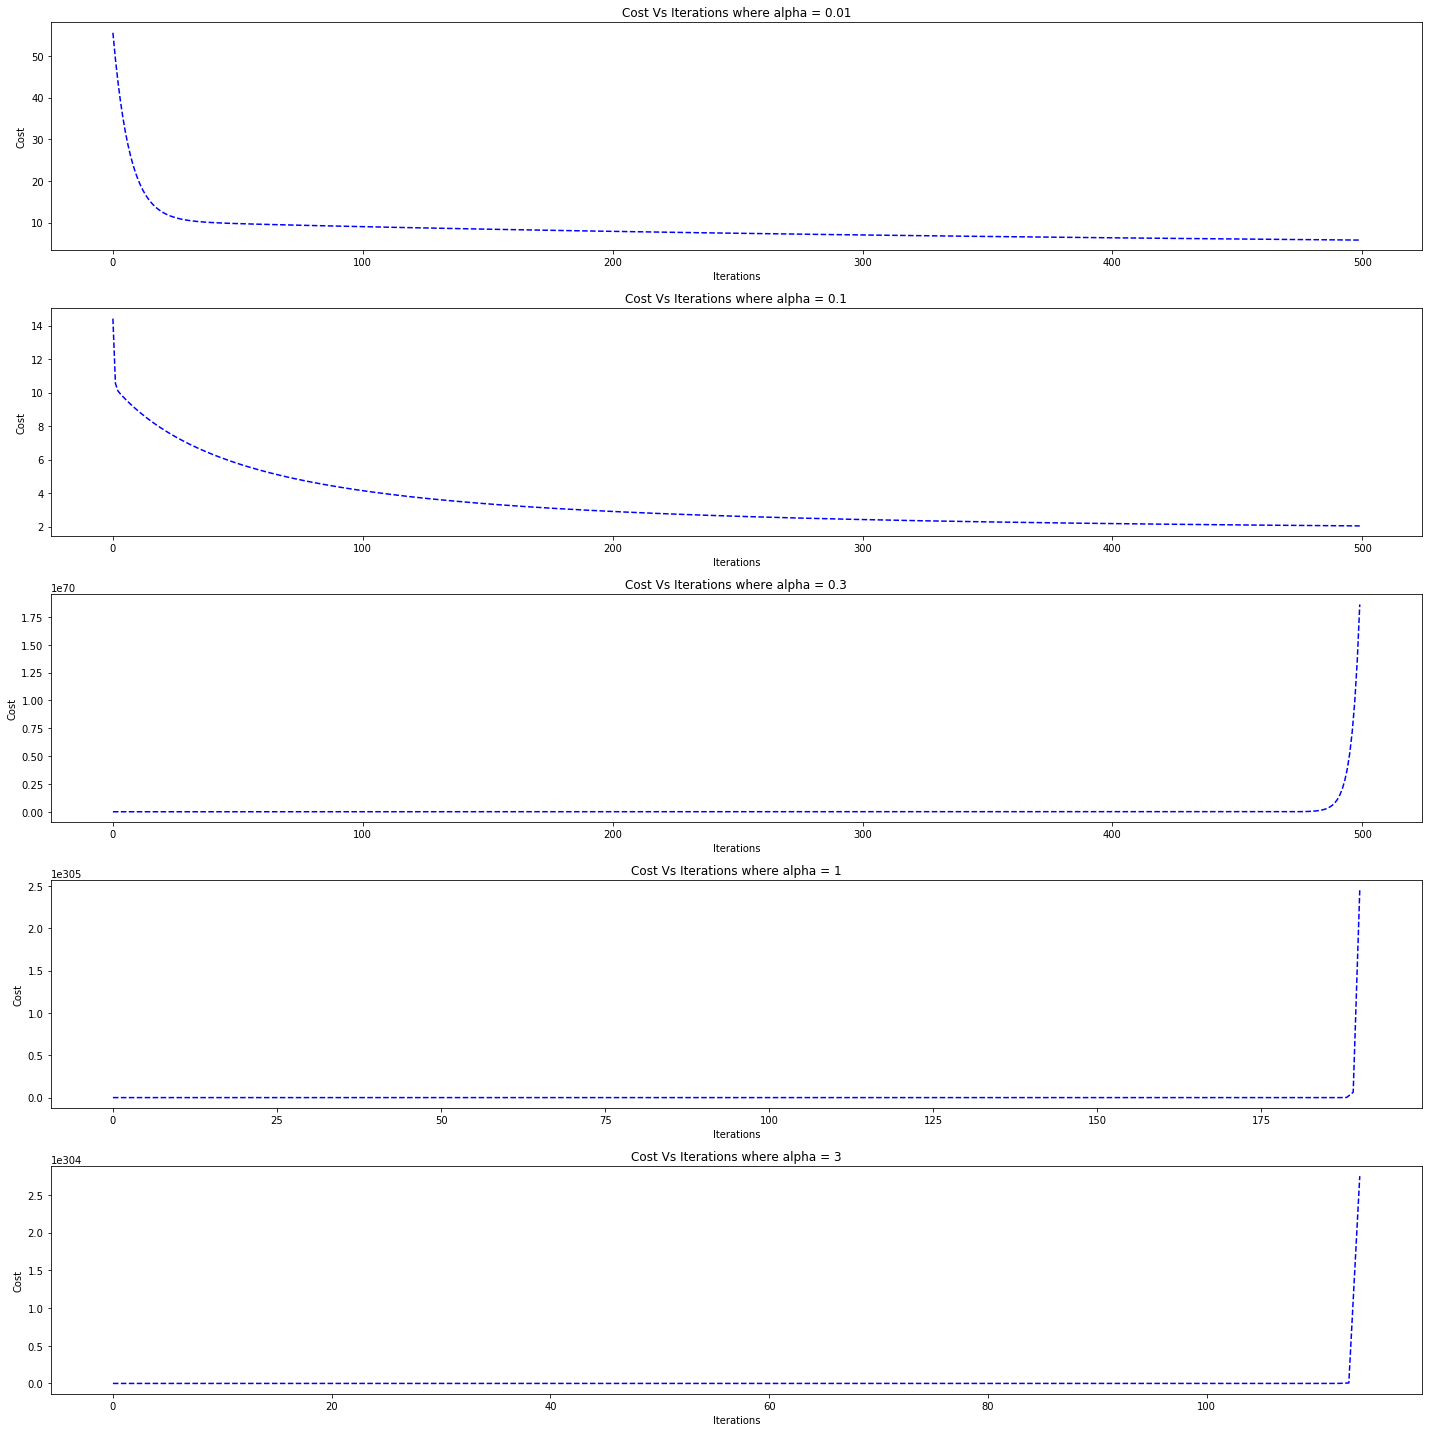

In [17]:

# Linear Regression# Linear  

data = pd.read_csv("student-mat.csv", delimiter =";")

X_train,X_test,y_train,y_test,theta = prepare_data(data)
  
iters = 500
fig, ax = plt.subplots(figsize=(20,20))  
sample=[1,2,3,4,5]
count = 510
for alpha in [0.01,0.1,0.3,1,3]:
    count+=1
    OptTheta, cost = gradientDescent_LinearR(X_train, y_train, theta, alpha, iters)  
    sample[count-511] = cost
    plt.subplot(count)
    plt.plot(np.arange(iters), sample[count-511], 'b--')
    plt.title('Cost Vs Iterations where alpha = {}'.format(alpha))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.tight_layout()

# Experiment 2
## Linear Regression with 10 random variables

In [60]:
data = pd.read_csv("student-mat.csv", delimiter =";")

#-------------------------------------------------------------
# have to delete the 'G1' and 'G2' variables also
#-------------------------------------------------------------
data = data.drop(['G1', 'G2'], axis = 1)

data_rand_features = pd.DataFrame(data.sample(n=10,axis = 1, random_state = 123))

if 'G3' not in data_rand_features.columns.names:
    data_rand_features = data_rand_features.drop(columns = [data_rand_features.columns[-1]])
    data_rand_features = pd.concat([data_rand_features, data['G3']], axis = 1)
   
X_train, X_test, y_train, y_test, theta = prepare_data(data_rand_features)
alpha = 0.01
iters = 5000
OptTheta, cost = gradientDescent_LinearR(X_train, y_train, theta, alpha, iters)

#y_predictions = X_test*OptTheta.T

results_LinearRegression(OptTheta,X_train,y_train,"Random_Train-Data Set")
results_LinearRegression(OptTheta,X_test,y_test,"Random_Test-Data Set")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression -> Running the Gradient Descent Algorithm for Random_Train-Data Set
Mean Squared error = 18.946271
Mean Absolute error = 3.267415
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression -> Running the Gradient Descent Algorithm for Random_Test-Data Set
Mean Squared error = 22.802704
Mean Absolute error = 3.802999
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Experiment 3
## Linear regression with Handpicked 10 features

In [61]:
data = pd.read_csv("student-mat.csv", delimiter =";")

#-------------------------------------------------------------
# have to delete the 'G1' and 'G2' variables also
#-------------------------------------------------------------
data = data.drop(['G1', 'G2'], axis = 1)

data_picked_features = data[['traveltime', 'failures', 'absences', 'Pstatus', 'Fjob','schoolsup','Medu','studytime','Mjob','Fjob']]
   
X_train, X_test, y_train, y_test, theta = prepare_data(data_rand_features)
alpha = 0.01
iters = 5000
OptTheta, cost = gradientDescent_LinearR(X_train, y_train, theta, alpha, iters)

#y_predictions = X_test*OptTheta.T

results_LinearRegression(OptTheta,X_train,y_train,"Handpicked_Train-Data Set")
results_LinearRegression(OptTheta,X_test,y_test,"Handpicked_Test-Data Set")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression -> Running the Gradient Descent Algorithm for Handpicked_Train-Data Set
Mean Squared error = 18.946271
Mean Absolute error = 3.267415
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression -> Running the Gradient Descent Algorithm for Handpicked_Test-Data Set
Mean Squared error = 22.802704
Mean Absolute error = 3.802999
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
